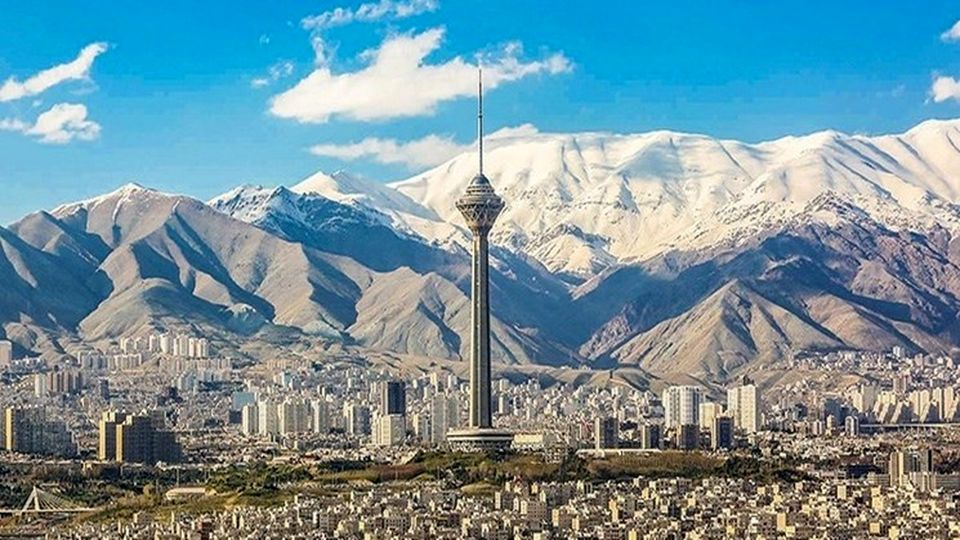

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import inv
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv("HousePrice.csv")
data.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [3]:
# Preprocessing

data['Parking'].replace([True ,False],[1,0], inplace=True)
data['Warehouse'].replace([True , False] , [1,0] , inplace=True)
data['Elevator'].replace([True , False] ,[1,0] , inplace = True)
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33


In [4]:
data.drop("Address", axis=1 , inplace=True)

In [5]:
data[data.duplicated()]

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
55,61,1,1,1,0,2.030000e+09,67666.67
78,74,2,1,1,1,1.700000e+09,56666.67
79,88,3,0,0,1,5.600000e+08,18666.67
80,63,1,1,1,1,2.150000e+09,71666.67
81,114,3,1,1,1,5.500000e+09,183333.33
...,...,...,...,...,...,...,...
3453,80,2,1,1,1,2.250000e+09,75000.00
3455,55,1,1,1,1,2.300000e+09,76666.67
3456,60,1,1,1,1,1.950000e+09,65000.00
3470,75,2,0,0,0,3.650000e+08,12166.67


In [6]:
data.drop_duplicates(inplace=True)
data[data.duplicated()]

,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)


<Axes: >

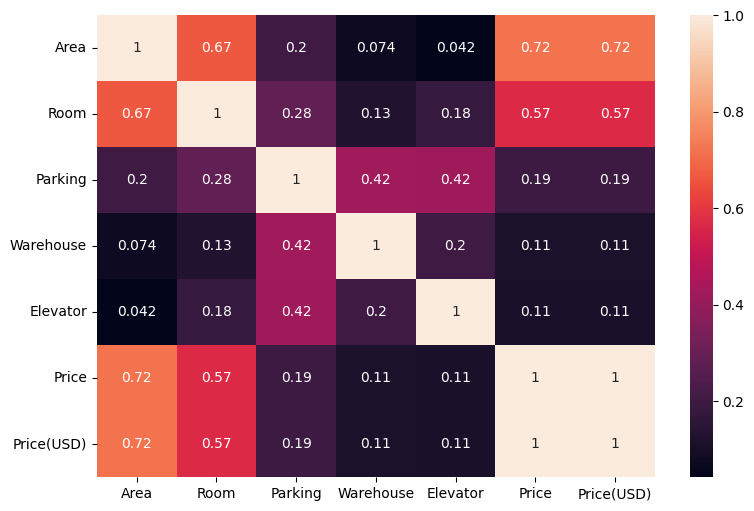

In [7]:
corr = data.corr().round(2)
plt.figure(figsize=(9,6))
sns.heatmap(data.corr() ,  annot = True )

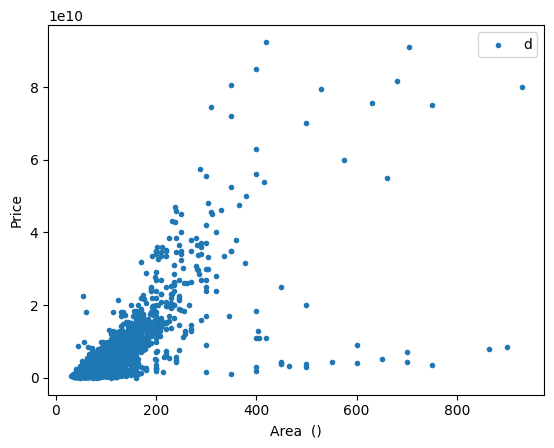

In [8]:
plt.scatter(data['Area'] ,data['Price'] , marker='.')
plt.xlabel("Area  ()")
plt.ylabel("Price")
plt.legend("data")
plt.show()

In [9]:
X = np.array(data[["Area"]])
Y = np.array(data[["Price"]])

print(X.shape)
print(Y.shape)

(3055, 1)
(3055, 1)


In [10]:
X_train , Y_train ,X_test , Y_test = train_test_split(X ,Y , test_size=0.2 )
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(2444, 1)
(611, 1)
(2444, 1)
(611, 1)


In [19]:
from lls import LinearLeastSquare

In [18]:
lls = LinearLeastSquare()

In [21]:
lls.fit(X_train,Y_train)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 611 is different from 2444)

In [14]:
Y_pred = lls.predict(X_test)

ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

ValueError: x and y must be the same size

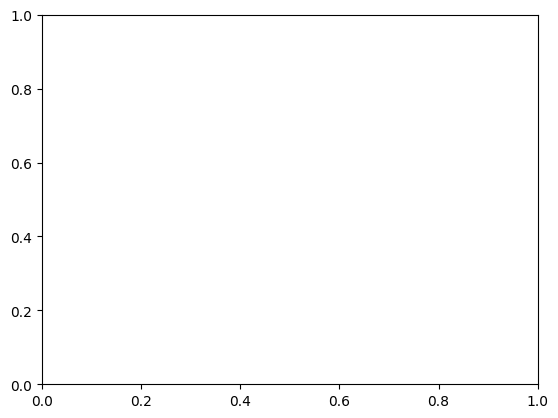

In [16]:
plt.scatter(X_train,Y_train ,marker='.')
plt.scatter(X_test,Y_test,marker=".")
plt.plot(X_test ,Y_pred ,color='green' , lw =2)
plt.xlabel("length")
plt.ylabel("height")
plt.legend(["Train data" , "Test data" , "AI linear regression" , "Manual linear regression"] , loc="upper left") 
plt.show() 

In [17]:
lls.evaluate(X_test , Y_test , "mae")

ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)